In [3]:
# autoreload
%load_ext autoreload
%autoreload 2

from settings import Settings
from dataloader_ml import DataHandler
import json
import matplotlib.pyplot as plt

# Load configuration using the Settings class
settings = Settings(
    default_config="default.toml",
    project_config="example.toml"
)

print(f"Project: {settings.get('general.name')}")
print(f"Base path: {settings.get('data.base_path')}")
print(f"Model folder: {settings.get('data.model_folder')}")

# Create necessary directories
settings.create_directories()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Project: NFmouse_Segmagic
Base path: L:\Robert Blum\GPU PC Backup\Annotations\NF_mouse\Segmagic
Model folder: L:\Robert Blum\GPU PC Backup\Annotations\NF_mouse\Segmagic\models


In [4]:
data = DataHandler(settings)
data.train_test_split(test_ratio=0.1, valid_ratio=0.2)
distribution = data.run_data_loader()

with open(settings.get('data.model_folder')+"/distribution.json", 'w') as f:    
    json.dump(distribution, f, indent=4)

Loading data:   0%|          | 0/14 [00:00<?, ?it/s]

split into training: 9, valid: 3, and testing: 2
Training data:
0: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
1: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
2: R2_Sham_1wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
3: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
4: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
5: B4_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_2_stain-NF200.tiff
6: B5_CCI_1wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
7: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_1_stain-NF200.tiff
8: B3_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
Validation data:
0: B5_CCI_1wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
2: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
Test data:
0: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_5_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Kernel size: 512


### Loading and splitting data

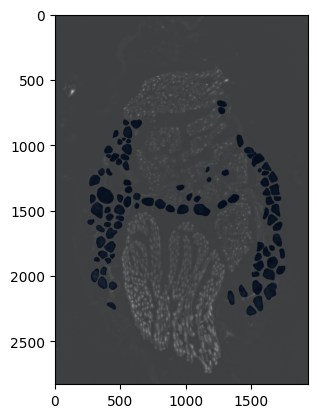

In [5]:
plt.imshow(data.train_data[0].regions[0]['image'][0,:,:], cmap='gray')
plt.imshow(data.train_data[0].regions[0]['mask'][0,:,:], cmap='Blues',alpha=0.25)
plt.show()

### Training model
#### you will find the best model and its metrices in 'base_path'/model

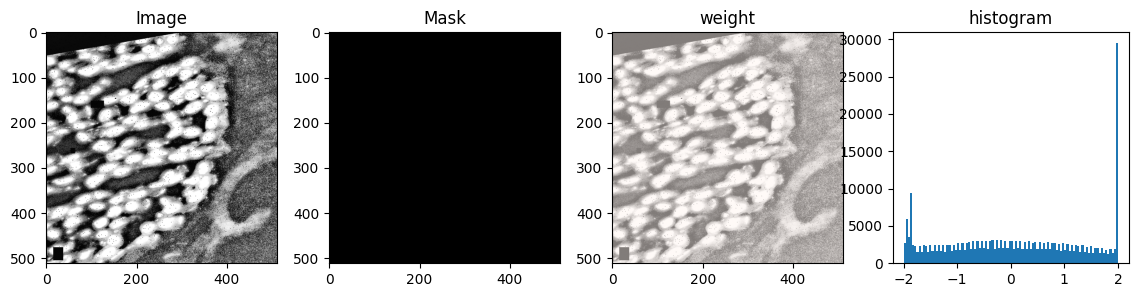

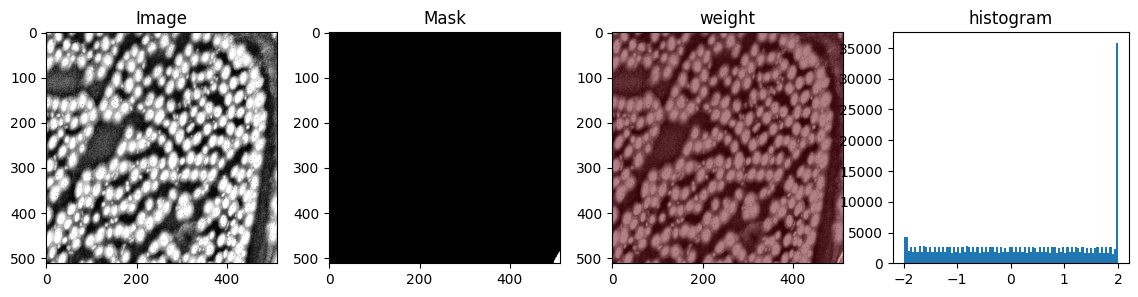

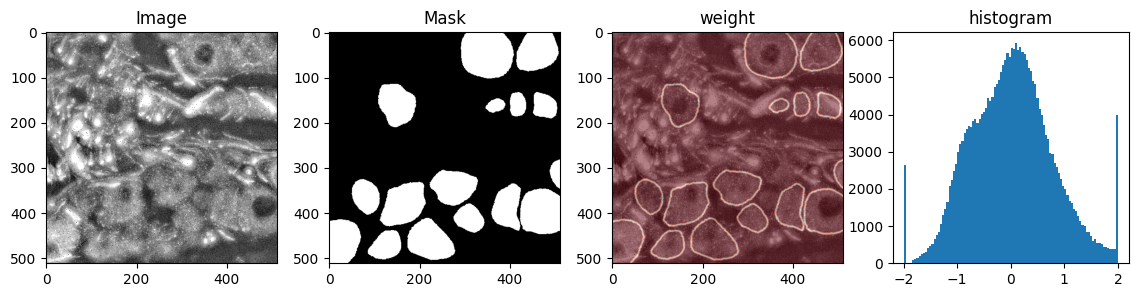

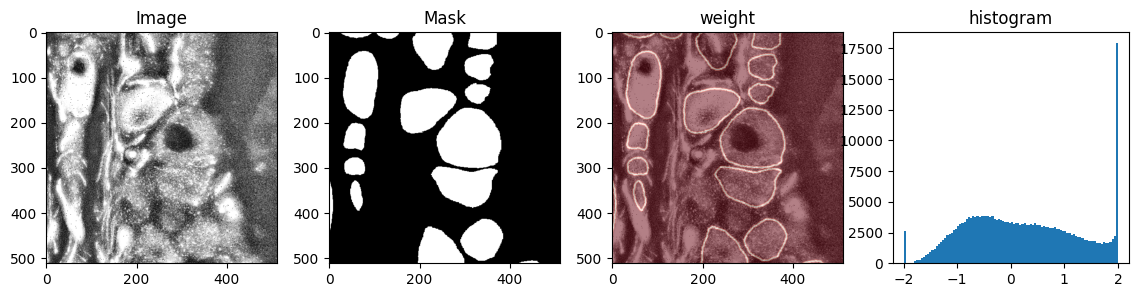

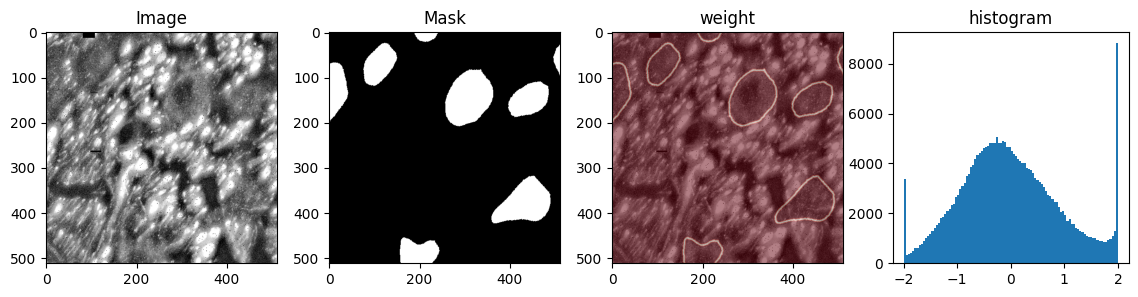

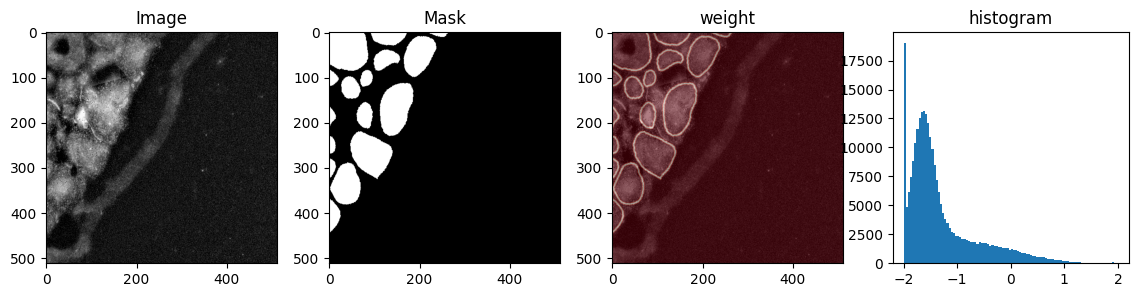

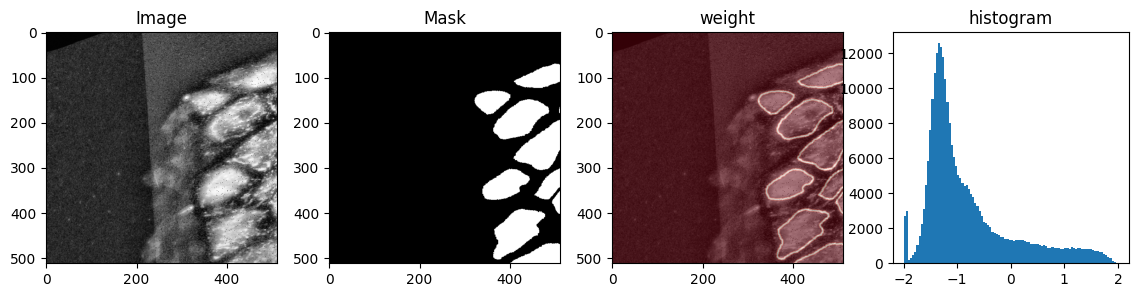

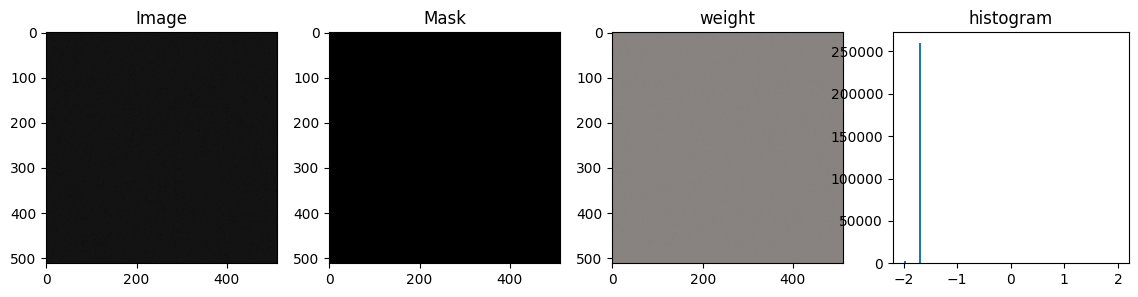

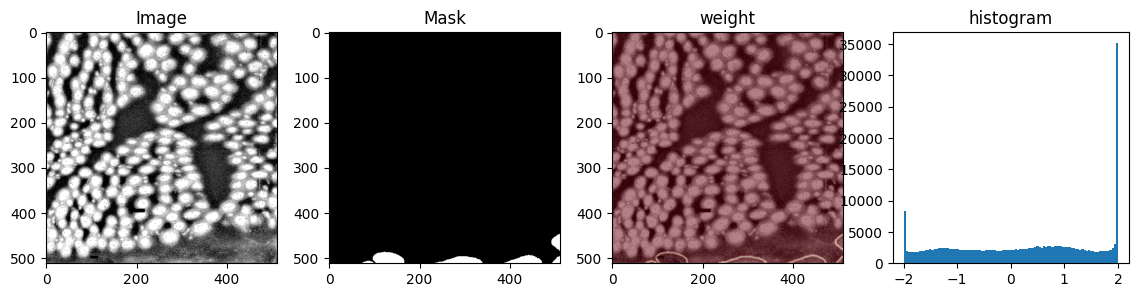

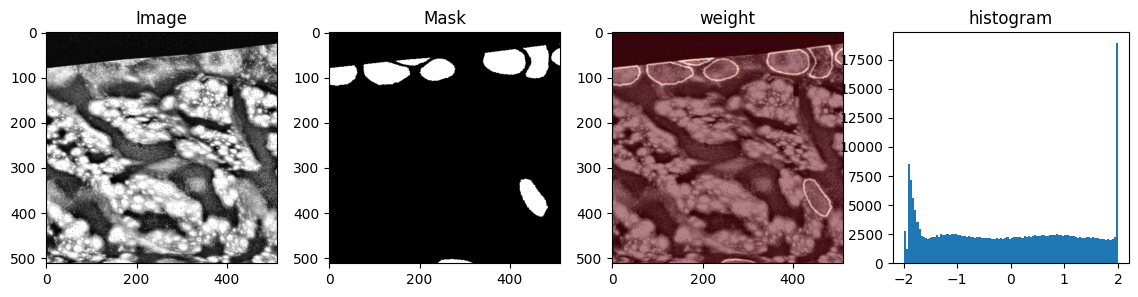

In [6]:
image, mask, weights = data.show_example_batch()

for index in range(0, image.shape[0]):
    plt.figure(figsize=(14, 3))
    plt.subplot(1, 4, 1)
    plt.title("Image")
    plt.imshow(image[index, 0, :], cmap='gray', vmin=-2, vmax=2)
    plt.subplot(1, 4, 2)
    plt.title("Mask")
    plt.imshow(mask[index, 0, :], cmap='gray')
    plt.subplot(1, 4, 3)
    plt.title("weight")
    plt.imshow(image[index, 0, :], cmap='gray', vmin=-2, vmax=2)
    plt.imshow(weights[index, 0, :], cmap='Reds', alpha=0.5)
    plt.subplot(1, 4, 4)
    plt.title("histogram")
    plt.hist(image[index, 0, :].flatten(), bins=100, range=(-2, 2))
    plt.show()
    plt.close()

In [7]:
from segmagic_ml import Segmagic

seg = Segmagic(settings)
seg.train_model(
    data
)

config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

c:\Users\Schulte_A\AppData\Local\anaconda3\envs\segmagic\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Schulte_A\.cache\huggingface\hub\models--smp-hub--resnet34.imagenet. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

wandb: Currently logged in as: anmschulte (neu-sci) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Using 16bit Automatic Mixed Precision (AMP)
💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\Schulte_A\AppData\Local\anaconda3\envs\segmagic\Lib\site-packages\pytorch_lightning\trainer\connectors\logger_connector\logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type        | Params 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 1 for best soft validation F1: 0.4325660765171051


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 2 for best soft validation F1: 0.7872260212898254


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 3 for best soft validation F1: 0.7895236611366272


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 6 for best soft validation F1: 0.791842520236969


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 8 for best soft validation F1: 0.7960078716278076


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 9 for best soft validation F1: 0.8142461776733398


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 15 for best soft validation F1: 0.8174149394035339


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 16 for best soft validation F1: 0.822217583656311


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 20 for best soft validation F1: 0.8236238360404968


Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 21 for best soft validation F1: 0.8236287832260132


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Saving model for epoch 31 for best soft validation F1: 0.8385382294654846


Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]


Detected KeyboardInterrupt, attempting graceful shutdown ...


NameError: name 'exit' is not defined

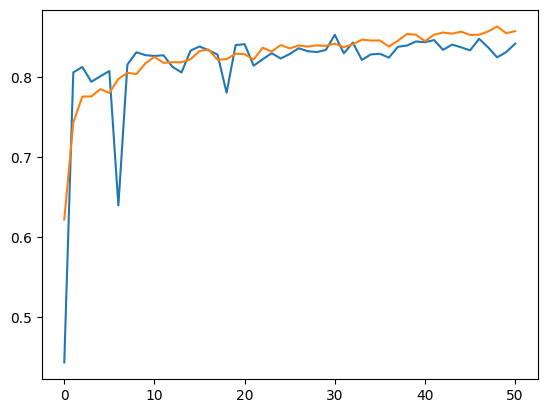

In [8]:
import matplotlib.pyplot as plt
plt.plot(seg.model.tml.metrics['val_f1'].history['micro'])
plt.plot(seg.model.tml.metrics['train_f1'].history['micro'])

In [ ]:
from segmagic_ml import Segmagic

seg = Segmagic(settings)
seg.train_model_ensemble(
    3,
    data
)

split into training: 9, valid: 3, and testing: 2
Training data:
0: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
2: B3_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
3: R2_Sham_1wDRG_L5_CL_Cirl3_NF_fabp7_3_stain-NF200.tiff
4: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
5: B1_Sham_4wDRG_L5_CL_Cirl3_NF_fabp7_6_stain-NF200.tiff
6: B5_CCI_1wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
7: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_1_stain-NF200.tiff
8: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_1_stain-NF200.tiff
Validation data:
0: B4_CCI_4wDRG_L5_IL_Cirl3_NF_fabp7_2_stain-NF200.tiff
1: B5_CCI_1wDRG_L5_IL_Cirl3_NF_fabp7_3_stain-NF200.tiff
2: B4_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Test data:
0: B1_Sham_4wDRG_L5_IL_Cirl3_NF_fabp7_5_stain-NF200.tiff
1: B3_CCI_4wDRG_L5_CL_Cirl3_NF_fabp7_5_stain-NF200.tiff
Kernel size: 512


### Testing model
#### Test results are stored under 'base_path'/Testing

Loaded model from L:\Robert Blum\GPU PC Backup\Annotations\NF_mouse\Segmagic\models\best_model.pth


  0%|          | 0/121 [00:00<?, ?it/s]

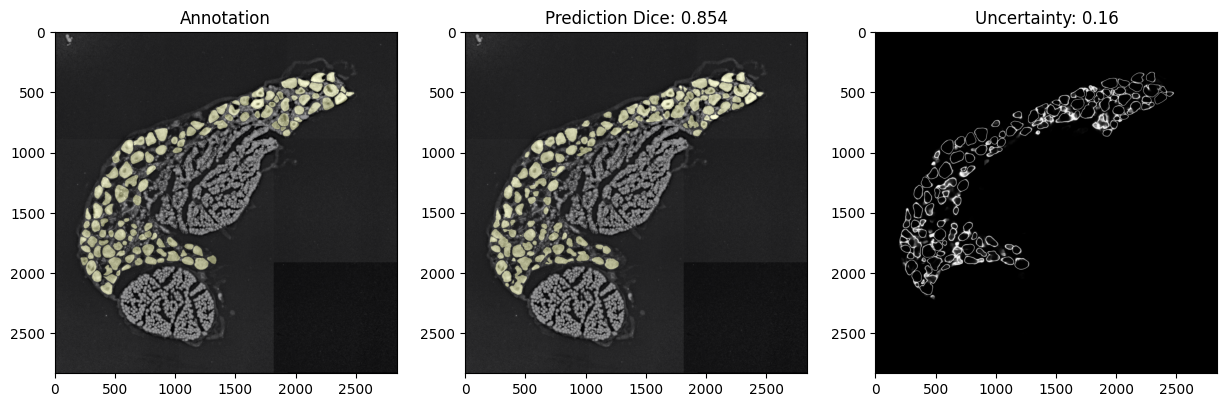

  0%|          | 0/154 [00:00<?, ?it/s]

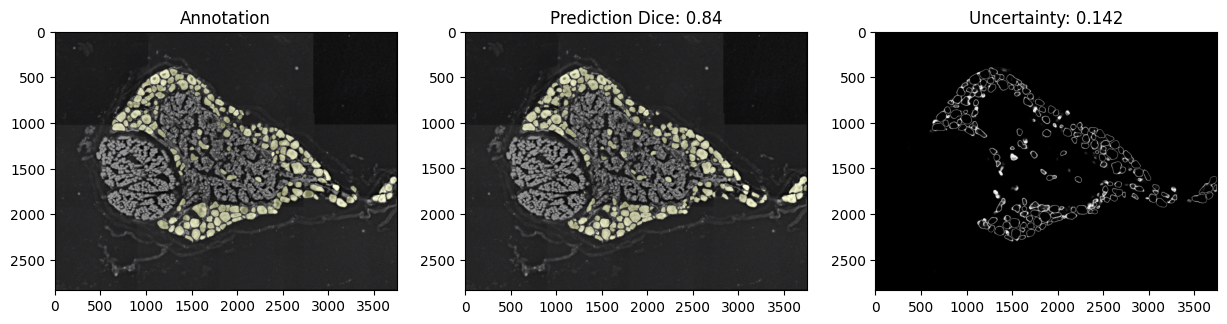

In [10]:
from segmagic_ml import Segmagic

seg = Segmagic(settings)
################## chose image to predict ##################
seg.test_images(data)
#seg.predict_image(image_to_predict, labels,show=True)